In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('heartdisease.csv')
A = data[['age', 'male','currentSmoker', 'prevalentHyp']]
matrix = np.array(A.values, 'float')
X1 = matrix[:,(0,1,2)]
Y = matrix[:,3]
a = np.max(X1[:, 0])
X1[:,0] = X1[:,0]/(np.max(X1[:, 0]))
X1 = X1.reshape([Y.size, 3])
x = np.hstack([np.ones((X1[:,0].size, 1)), X1])
theta = np.zeros((4,1))
m = np.size(Y)
iterholder = np.zeros((1000,1))
def sigmoid(inputin):
    f = inputin
    return 1/(1 + np.exp(-f))

def compute(x, Y, theta):
    alpha = 0.000001
    iteration = 1000
    # gradient descend thing
    J_history = np.zeros([iteration, 1])

    for iter in range(0, iteration):
        thing = (x @ theta)
        Hx = sigmoid(thing)
        sigma = Hx - Y
        temp0 = theta[0] - ((alpha / m) * np.sum(sigma * x[:, 0]))
        temp1 = theta[1] - ((alpha / m) * np.sum(sigma * x[:, 1]))
        temp2 = theta[2] - ((alpha / m) * np.sum(sigma * x[:, 2]))
        temp3 = theta[3] - ((alpha / m) * np.sum(sigma * x[:, 3]))
        theta = np.array([temp0, temp1, temp2, temp3]).reshape(4, 1)
        iterholder[iter] = iter
        J_history[iter] = (1/m)*(np.sum(((-Y) @ np.log(Hx))-(((1-Y) @ np.log(1-Hx)))))

    return theta, J_history

Theta, J_hist = compute(x, Y, theta)

[0.361514]


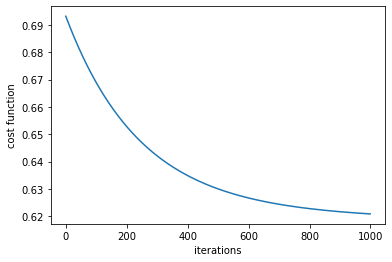

In [35]:
#       X1, age, gender, currentSmoker
predict = [1, 29/a, 1, 0] @ Theta
print(sigmoid(predict))
plt.plot(iterholder,J_hist,'-')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()